# Lab2

### 1.SIGNAL TO NOISE RATIO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, get_window, hann

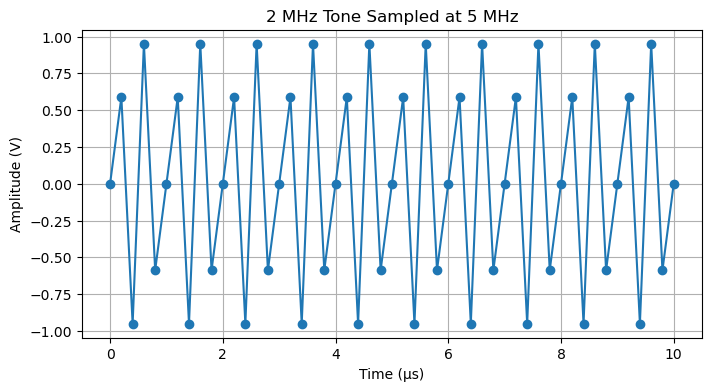

In [ ]:
def first_1():
    
    f = 2e6  
    Fs = 5e6  
    T = 1e-5  
    A = 1.0   

    
    t = np.arange(0, T, 1/Fs)

    
    signal = A * np.sin(2 * np.pi * f * t)

    
    plt.figure(figsize=(8,4))
    plt.plot(t * 1e6, signal, marker='o', linestyle='-')
    plt.xlabel('Time (µs)')
    plt.ylabel('Amplitude (V)')
    plt.title('2 MHz Tone Sampled at 5 MHz')
    plt.grid()
    plt.show()

first_1()

### (a)

d:\anaconda\envs\AI\lib\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 5000000 is greater than input length  = 500001, using nperseg = 500001
  warnings.warn('nperseg = {0:d} is greater than input length '


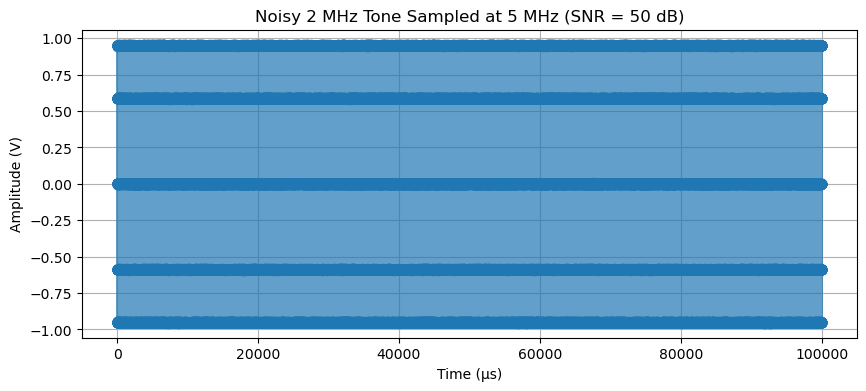

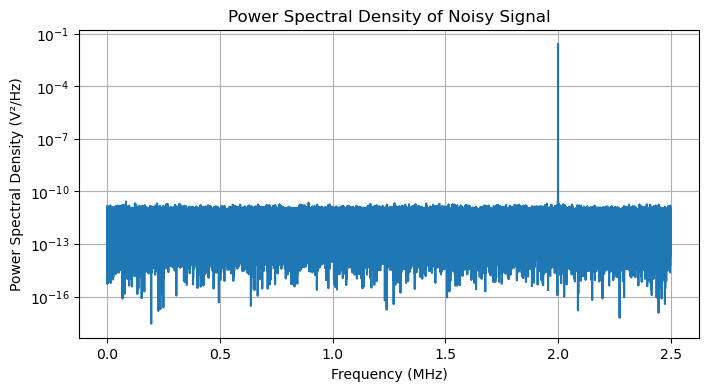

Theoretical Noise Variance (Gaussian): 4.999990e-06
Estimated SNR from PSD: 49.99 dB
Variance of Equivalent Uniform Noise: 1.499997e-05


In [ ]:
def first_2():

    f = 2e6  
    Fs = 5e6  
    T = 1e-1  
    A = 1.0   
    SNR_dB = 50  

    # Time vector
    t = np.arange(0, T, 1/Fs)

    
    signal = A * np.sin(2 * np.pi * f * t)

    
    P_signal = np.mean(signal**2)  
    SNR_linear = 10**(SNR_dB / 10)  
    noise_variance = P_signal / SNR_linear  

    
    gaussian_noise = np.sqrt(noise_variance) * np.random.randn(len(t))

    
    noisy_signal = signal + gaussian_noise

    
    frequencies, psd = welch(noisy_signal, fs=Fs, nperseg=5000000)

    
    signal_bin = np.argmax(psd)  # Index of the peak in the PSD
    # print(frequencies[signal_bin])
    P_signal_psd = psd[signal_bin]  # Peak power
    P_noise_psd = np.mean(psd[(frequencies > 2e6) | (frequencies < 2e6)])  # Average noise power
    SNR_estimated_dB = 10 * np.log10(P_signal_psd / P_noise_psd)

    # Compute variance for uniformly distributed noise
    uniform_variance = 3 * noise_variance  

    # Plot time-domain signal
    plt.figure(figsize=(10,4))
    plt.plot(t * 1e6, noisy_signal, marker='o', linestyle='-', alpha=0.7)
    plt.xlabel('Time (µs)')
    plt.ylabel('Amplitude (V)')
    plt.title('Noisy 2 MHz Tone Sampled at 5 MHz (SNR = 50 dB)')
    plt.grid()
    plt.show()

    
    plt.figure(figsize=(8,4))
    plt.semilogy(frequencies / 1e6, psd)
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Power Spectral Density (V²/Hz)')
    plt.title('Power Spectral Density of Noisy Signal')
    plt.grid()
    plt.show()

    # Print results
    print(f"Theoretical Noise Variance (Gaussian): {noise_variance:.6e}")
    print(f"Estimated SNR from PSD: {SNR_estimated_dB:.2f} dB")
    print(f"Variance of Equivalent Uniform Noise: {uniform_variance:.6e}")

first_2()


### (b)

Hann Window: Estimated SNR = 50.00368699186107 dB
Hamming Window: Estimated SNR = 50.00368699186107 dB
Blackman Window: Estimated SNR = 50.00368699186107 dB


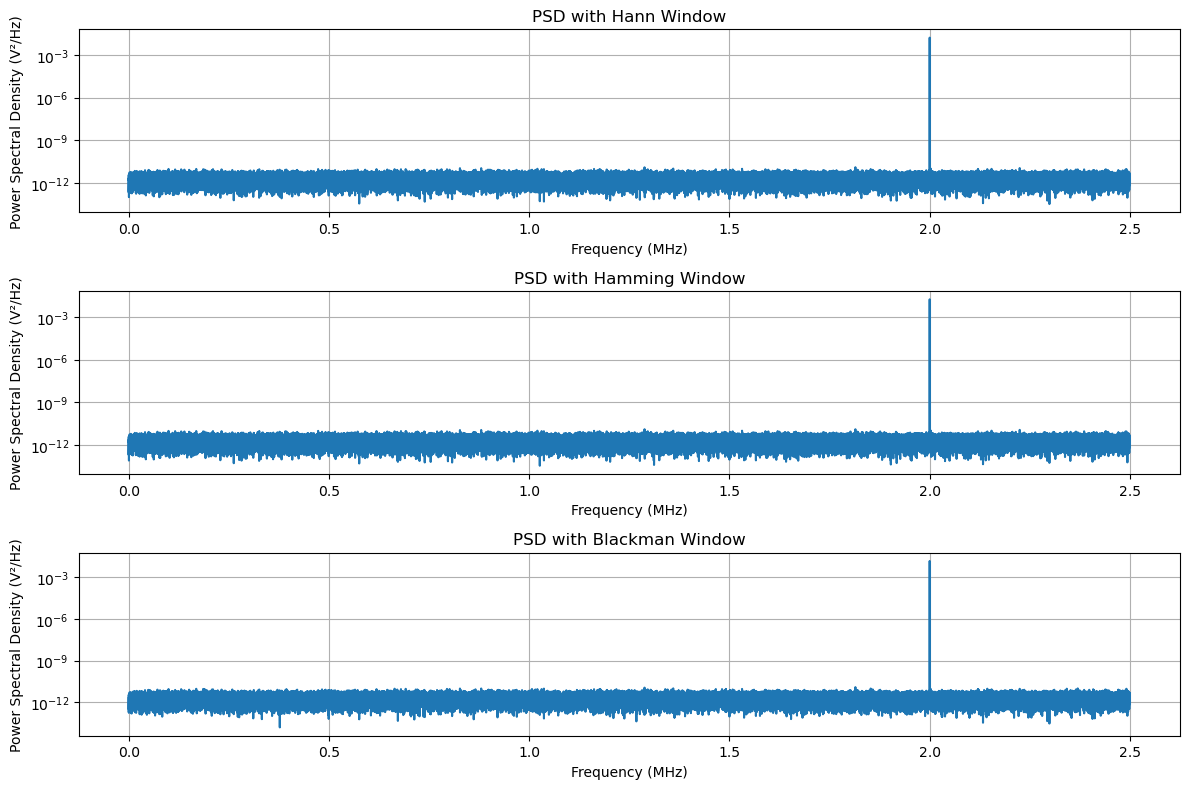

In [ ]:


def first_3():
    # Parameters
    f = 2e6  
    Fs = 5e6  
    T = 1e-1  
    A = 1.0  
    SNR_dB = 50  

    
    t = np.arange(0, T, 1/Fs)


    signal = A * np.sin(2 * np.pi * f * t)



    P_signal = np.var(signal)


    SNR_linear = 10**(SNR_dB / 10)
    noise_variance = P_signal / SNR_linear


    gaussian_noise = np.sqrt(noise_variance) * np.random.randn(len(t))
    P_noise = np.var(gaussian_noise)


    noisy_signal = signal + gaussian_noise


    windows = {
        'hann': 'hann', 
        'hamming': 'hamming',
        'blackman': 'blackman'
    }


    plt.figure(figsize=(12, 8))


    for window_name, window_func in windows.items():
       
        nperseg_value = min(len(t), len(t)//2)  
        frequencies, psd = welch(noisy_signal, fs=Fs, nperseg=nperseg_value, window=window_func)
        
        
        window = get_window(window_func, len(t)) 
        window_energy = np.sum(window**2) / len(t)  
     
        P_signal_windowed = P_signal * window_energy
        
        
        noise_indices = (frequencies > 2e6) | (frequencies < 2e6)
        # P_noise_psd = np.mean(psd[noise_indices])
        # P_noise_psd = np.mean(psd[noise_indices])* window_energy 
        P_noise_psd = P_noise * window_energy
        
       
        SNR_estimated_dB = 10 * np.log10(P_signal_windowed / P_noise_psd)

       
        plt.subplot(3, 1, list(windows.keys()).index(window_name) + 1)
        plt.semilogy(frequencies / 1e6, psd)
        plt.title(f'PSD with {window_name.capitalize()} Window')
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Power Spectral Density (V²/Hz)')
        plt.grid()

       
        print(f"{window_name.capitalize()} Window: Estimated SNR = {SNR_estimated_dB} dB")

   
    plt.tight_layout()
    plt.show()


first_3()


## 2.Quantization

### (a)

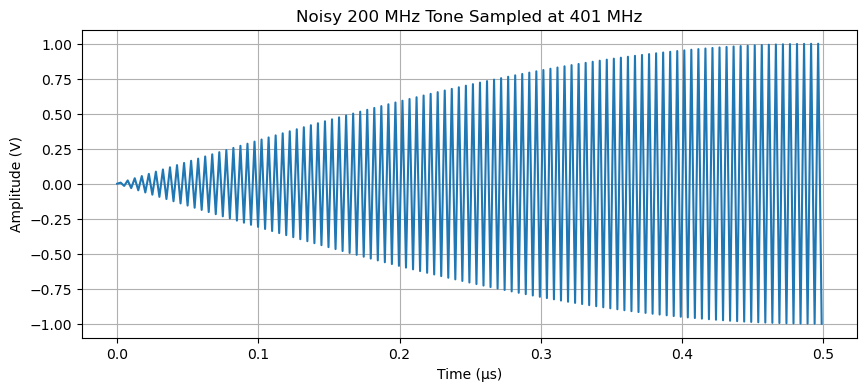

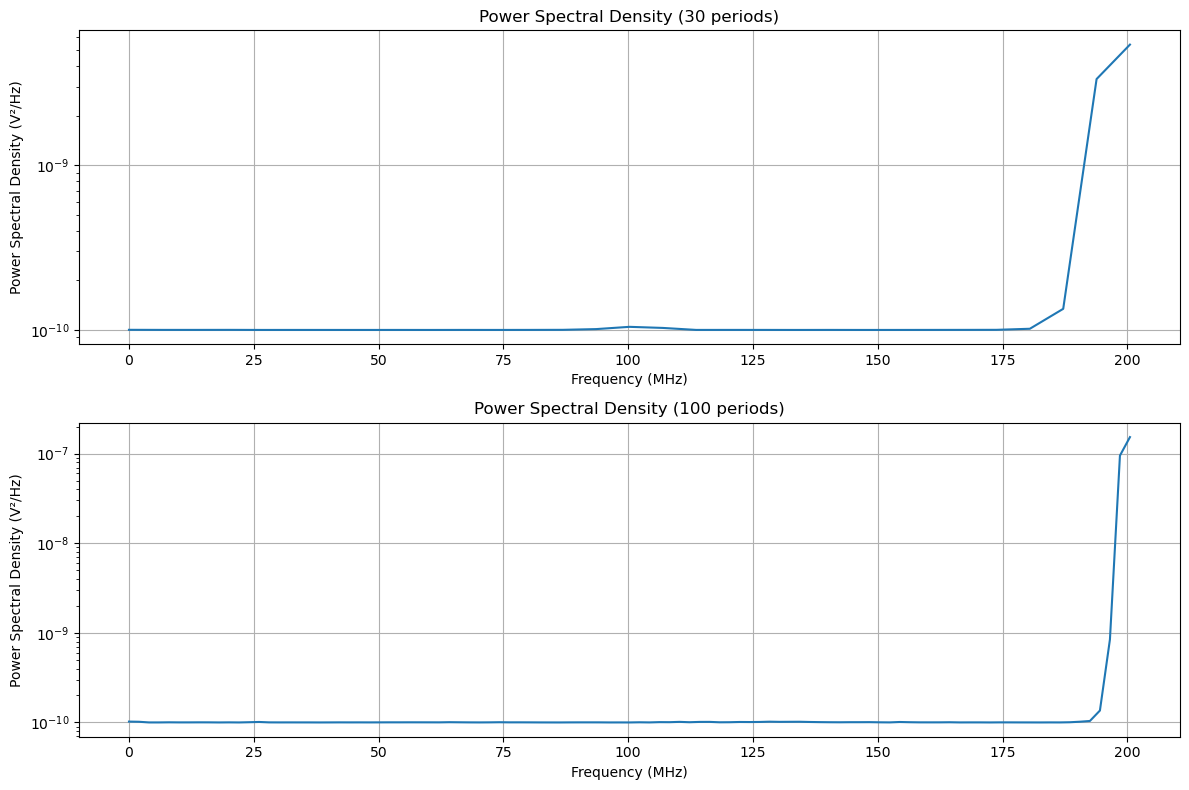

SNR for 30 periods: 29.214962441086286 dB
SNR for 100 periods: 38.01789593840259 dB


In [95]:


def second_1():

    f_signal = 200e6
    Fs = 401e6
    T_period = 1 / f_signal
    num_periods_30 = 30
    num_periods_100 = 100
    bit_resolution = 6
    full_scale = 1.0

    t_period_30 = np.arange(0, num_periods_30 * T_period, 1 / Fs)
    t_period_100 = np.arange(0, num_periods_100 * T_period, 1 / Fs)

    signal_30 = full_scale * np.sin(2 * np.pi * f_signal * t_period_30)
    signal_100 = full_scale * np.sin(2 * np.pi * f_signal * t_period_100)

    plt.figure(figsize=(10,4))
    plt.plot(t_period_100 * 1e6, signal_100)
    plt.xlabel('Time (µs)')
    plt.ylabel('Amplitude (V)')
    plt.title('Noisy 200 MHz Tone Sampled at 401 MHz')
    plt.grid()
    plt.show()

    quant_levels = 2 ** bit_resolution
    quantized_signal_100 = np.round(signal_100 * (quant_levels / 2)) * (2 / quant_levels)
    quantized_signal_30 = np.round(signal_30 * (quant_levels / 2)) * (2 / quant_levels)

    quantized_noise_30 = -(quantized_signal_30 - signal_30)
    P_noise_30 = np.var(quantized_noise_30)

    quantized_noise_100 = -(quantized_signal_100 - signal_100)
    P_noise_100 = np.var(quantized_noise_100)

    nperseg_value_30 = min(2048, len(quantized_signal_30[:int(num_periods_30 * T_period * Fs)]))
    frequencies_30, psd_30 = welch(quantized_signal_30[:int(num_periods_30 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_30)

    nperseg_value_100 = min(2048, len(quantized_signal_100[:int(num_periods_100 * T_period * Fs)]))
    frequencies_100, psd_100 = welch(quantized_signal_100[:int(num_periods_100 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_100)

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.semilogy(frequencies_30 / 1e6, psd_30 + 1e-10)
    plt.title("Power Spectral Density (30 periods)")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(frequencies_100 / 1e6, psd_100 + 1e-10)
    plt.title("Power Spectral Density (100 periods)")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.tight_layout()
    plt.show()

    P_signal_30 = np.var(signal_30)
    SNR_30_dB = 10 * np.log10(P_signal_30 / P_noise_30)

    P_signal_100 = np.var(signal_100)
    SNR_100_dB = 10 * np.log10(P_signal_100 / P_noise_100)

    print(f"SNR for 30 periods: {SNR_30_dB} dB")
    print(f"SNR for 100 periods: {SNR_100_dB} dB")

second_1()


### (b)

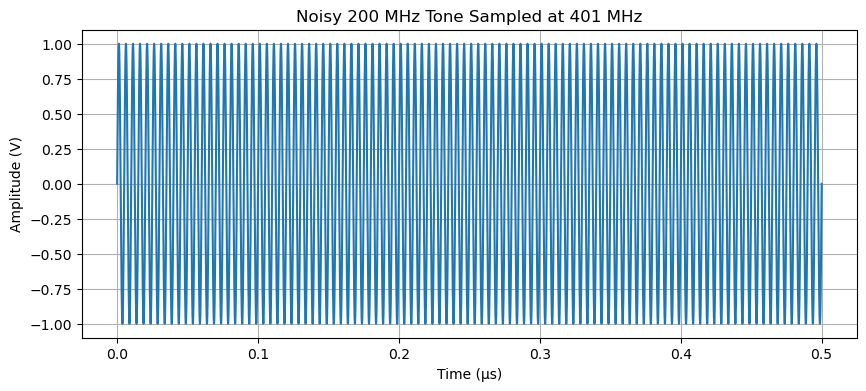

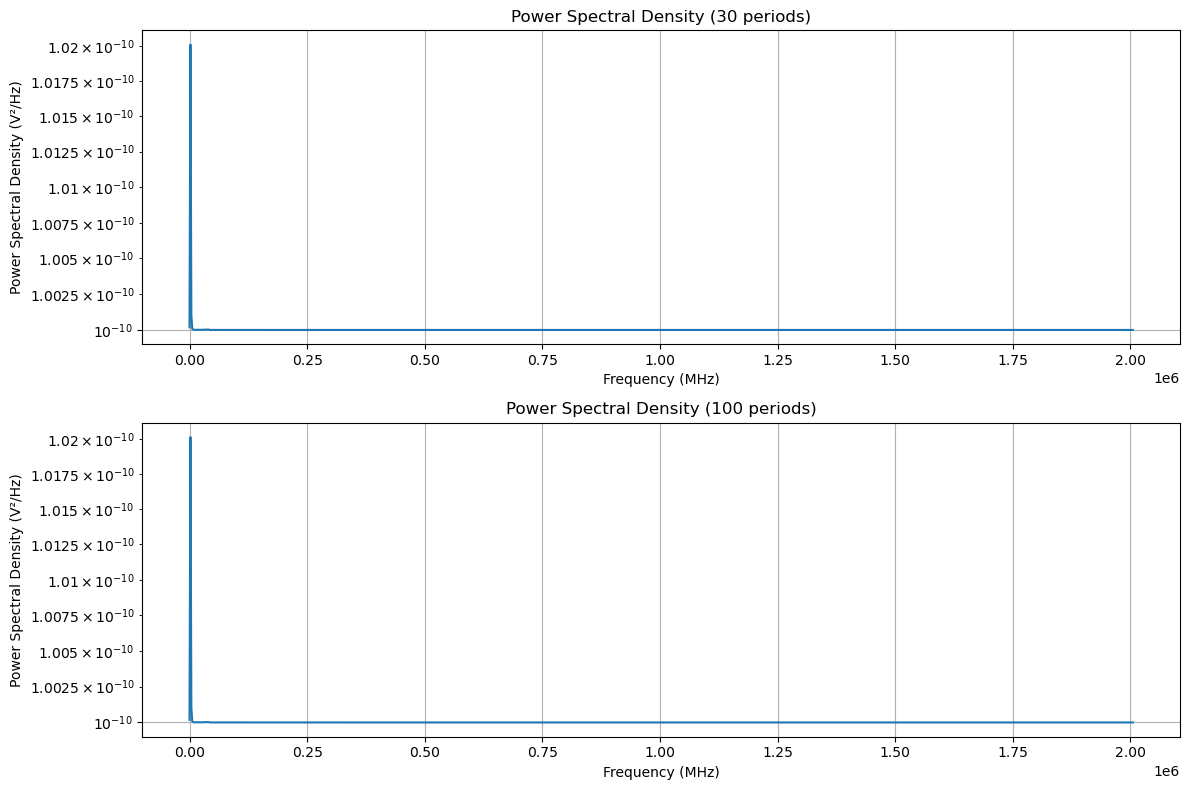

SNR for 30 periods: 38.07051130079783 dB
SNR for 100 periods: 38.070511300797826 dB


In [ ]:
def second_2():


   
    f_signal = 200e6  
    Fs = 1000e10 
    T_period = 1 / f_signal  
    num_periods_30 = 30  
    num_periods_100 = 100 
    bit_resolution = 6  
    full_scale = 1.0 

  
    t_period_30 = np.arange(0, num_periods_30 * T_period, 1 / Fs)
    t_period_100 = np.arange(0, num_periods_100 * T_period, 1 / Fs)

    
    signal_30 = full_scale * np.sin(2 * np.pi * f_signal * t_period_30)
    signal_100 = full_scale * np.sin(2 * np.pi * f_signal * t_period_100)
    




    plt.figure(figsize=(10,4))
    plt.plot(t_period_100 * 1e6, signal_100)
    plt.xlabel('Time (µs)')
    plt.ylabel('Amplitude (V)')
    plt.title('Noisy 200 MHz Tone Sampled at 401 MHz')
    plt.grid()
    plt.show()

    
    quant_levels = 2 ** bit_resolution  
    quantized_signal_100 = np.round(signal_100 * (quant_levels / 2)) * (2 / quant_levels)
    # quantized_signal_100 = np.round((signal_100 + 1) * (quant_levels / 2 - 1)) / (quant_levels / 2 - 1) * 2 - 1
    quantized_signal_30 = np.round(signal_30 * (quant_levels / 2)) * (2 / quant_levels)
    # quantized_signal_30 = np.round((signal_30 + 1) * (quant_levels / 2 - 1)) / (quant_levels / 2 - 1) * 2 - 1

    quantized_noise_30 = -(quantized_signal_30 - signal_30)
    P_noise_30 = np.var(quantized_noise_30)

    quantized_noise_100 = -(quantized_signal_100 - signal_100)
    P_noise_100 = np.var(quantized_noise_100)
    # print(quantized_signal)

    
    nperseg_value_30 = min(2048, len(quantized_signal_30[:int(num_periods_30 * T_period * Fs)]))
    frequencies_30, psd_30 = welch(quantized_signal_30[:int(num_periods_30 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_30)

  
    nperseg_value_100 = min(2048, len(quantized_signal_100[:int(num_periods_100 * T_period * Fs)]))
    frequencies_100, psd_100 = welch(quantized_signal_100[:int(num_periods_100 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_100)

    
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.semilogy(frequencies_30 / 1e6, psd_30 + 1e-10) 
    plt.title("Power Spectral Density (30 periods)")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(frequencies_100 / 1e6, psd_100 + 1e-10)  
    plt.title("Power Spectral Density (100 periods)")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.tight_layout()
    plt.show()

    
    # P_signal_30 = np.max(psd_30)  # Signal power at the peak
    P_signal_30 = np.var(signal_30)
    # P_noise_30 = np.mean(psd_30[(frequencies_30 > 2e8) | (frequencies_30 < 2e8)])  # Noise power around signal region
    
    SNR_30_dB = 10 * np.log10(P_signal_30 / P_noise_30)

    
    # P_signal_100 = np.max(psd_100)
    P_signal_100 = np.var(signal_100)
    # P_noise_100 = np.mean(psd_100[(frequencies_100 > 2e8) | (frequencies_100 < 2e8)])
    SNR_100_dB = 10 * np.log10(P_signal_100 / P_noise_100)

   
    print(f"SNR for 30 periods: {SNR_30_dB} dB")
    print(f"SNR for 100 periods: {SNR_100_dB} dB")


second_2()

### (c)

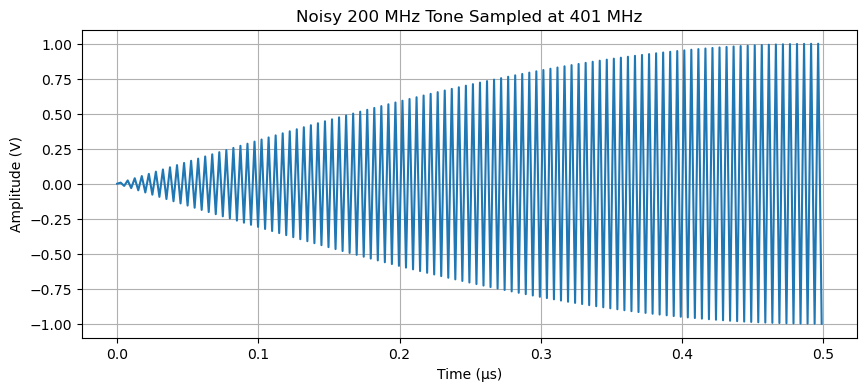

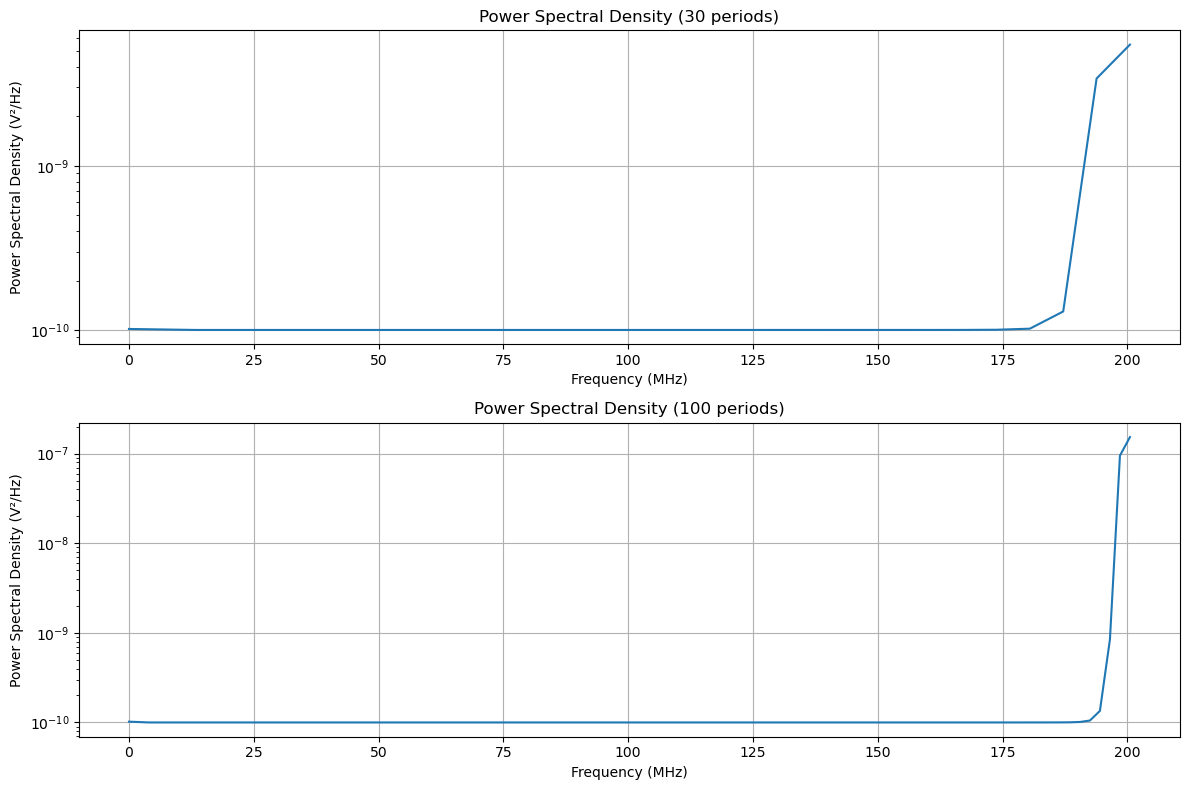

SNR for 30 periods: 66.59288240392353 dB
SNR for 100 periods: 74.40321824333458 dB


In [ ]:
def second_3():


 
    f_signal = 200e6 
    Fs = 401e6  
    T_period = 1 / f_signal  
    num_periods_30 = 30  
    num_periods_100 = 100  
    bit_resolution = 12  
    full_scale = 1.0  

    
    t_period_30 = np.arange(0, num_periods_30 * T_period, 1 / Fs)
    t_period_100 = np.arange(0, num_periods_100 * T_period, 1 / Fs)

    
    signal_30 = full_scale * np.sin(2 * np.pi * f_signal * t_period_30)
    signal_100 = full_scale * np.sin(2 * np.pi * f_signal * t_period_100)
    # print(signal)




    plt.figure(figsize=(10,4))
    plt.plot(t_period_100 * 1e6, signal_100)
    plt.xlabel('Time (µs)')
    plt.ylabel('Amplitude (V)')
    plt.title('Noisy 200 MHz Tone Sampled at 401 MHz')
    plt.grid()
    plt.show()

    
    quant_levels = 2 ** bit_resolution  
    quantized_signal_100 = np.round(signal_100 * (quant_levels / 2)) * (2 / quant_levels)
    # quantized_signal_100 = np.round((signal_100 + 1) * (quant_levels / 2 - 1)) / (quant_levels / 2 - 1) * 2 - 1
    quantized_signal_30 = np.round(signal_30 * (quant_levels / 2)) * (2 / quant_levels)
    # quantized_signal_30 = np.round((signal_30 + 1) * (quant_levels / 2 - 1)) / (quant_levels / 2 - 1) * 2 - 1

    quantized_noise_30 = -(quantized_signal_30 - signal_30)
    P_noise_30 = np.var(quantized_noise_30)

    quantized_noise_100 = -(quantized_signal_100 - signal_100)
    P_noise_100 = np.var(quantized_noise_100)
    # print(quantized_signal)

    
    nperseg_value_30 = min(2048, len(quantized_signal_30[:int(num_periods_30 * T_period * Fs)]))
    frequencies_30, psd_30 = welch(quantized_signal_30[:int(num_periods_30 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_30)

    
    nperseg_value_100 = min(2048, len(quantized_signal_100[:int(num_periods_100 * T_period * Fs)]))
    frequencies_100, psd_100 = welch(quantized_signal_100[:int(num_periods_100 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_100)

    
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.semilogy(frequencies_30 / 1e6, psd_30 + 1e-10)  
    plt.title("Power Spectral Density (30 periods)")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(frequencies_100 / 1e6, psd_100 + 1e-10) 
    plt.title("Power Spectral Density (100 periods)")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.tight_layout()
    plt.show()

    
    
    P_signal_30 = np.var(signal_30)
    # P_noise_30 = np.mean(psd_30[(frequencies_30 > 2e8) | (frequencies_30 < 2e8)])  # Noise power around signal region
    
    SNR_30_dB = 10 * np.log10(P_signal_30 / P_noise_30)

    
    # P_signal_100 = np.max(psd_100)
    P_signal_100 = np.var(signal_100)
    # P_noise_100 = np.mean(psd_100[(frequencies_100 > 2e8) | (frequencies_100 < 2e8)])
    SNR_100_dB = 10 * np.log10(P_signal_100 / P_noise_100)

    # Output SNR values
    print(f"SNR for 30 periods: {SNR_30_dB} dB")
    print(f"SNR for 100 periods: {SNR_100_dB} dB")


second_3()

### (d)

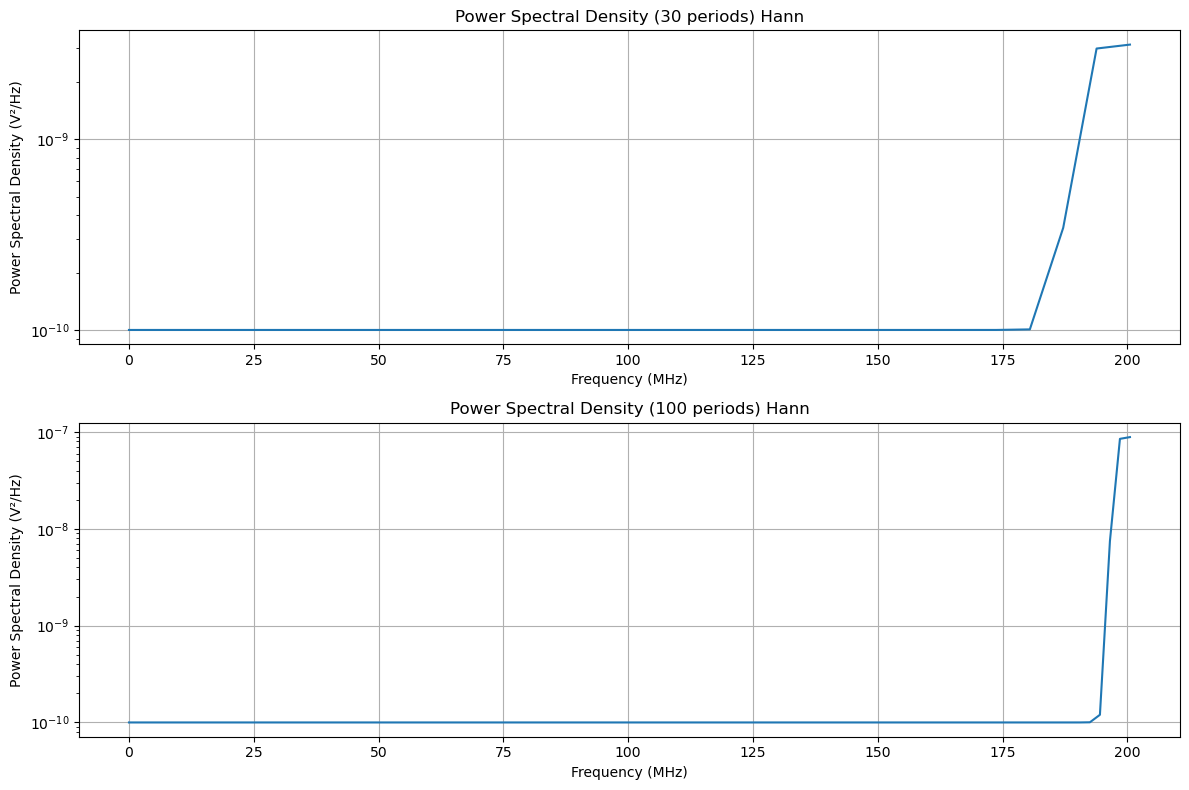

SNR for 30 periods: 64.96022696047541 dB
SNR for 100 periods: 74.16504595775802 dB


In [ ]:
def second_4():


    
    f_signal = 200e6  
    Fs = 401e6  
    T_period = 1 / f_signal 
    num_periods_30 = 30  
    num_periods_100 = 100  
    bit_resolution = 12 
    full_scale = 1.0  

    
    t_period_30 = np.arange(0, num_periods_30 * T_period, 1 / Fs)
    t_period_100 = np.arange(0, num_periods_100 * T_period, 1 / Fs)

    
    signal_30 = full_scale * np.sin(2 * np.pi * f_signal * t_period_30)
    signal_100 = full_scale * np.sin(2 * np.pi * f_signal * t_period_100)
    # print(signal)




    # plt.figure(figsize=(10,4))
    # plt.plot(t_period * 1e6, signal)
    # plt.xlabel('Time (µs)')
    # plt.ylabel('Amplitude (V)')
    # plt.title('Noisy 2 MHz Tone Sampled at 5 MHz (SNR = 50 dB)')
    # plt.grid()
    # plt.show()

    
    quant_levels = 2 ** bit_resolution  
    quantized_signal_100 = np.round(signal_100 * (quant_levels / 2)) * (2 / quant_levels)
    quantized_signal_30 = np.round(signal_30 * (quant_levels / 2)) * (2 / quant_levels)
    # print(quantized_signal)



    
    window_30 = hann(len(quantized_signal_30))  
    window_o_30 = hann(len(signal_30))
    window_original_signal_30 = signal_30 * window_o_30
    windowed_signal_30 = quantized_signal_30 * window_30

    
    window_100 = hann(len(quantized_signal_100))  
    window_o_100 = hann(len(signal_100))
    window_original_signal_100 = signal_100 * window_o_100
    windowed_signal_100 = quantized_signal_100 * window_100

    
    nperseg_value_30 = min(20480, len(windowed_signal_30[:int(num_periods_30 * T_period * Fs)]))
    frequencies_30, psd_30 = welch(windowed_signal_30[:int(num_periods_30 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_30)

    
    nperseg_value_100 = min(20480, len(windowed_signal_100[:int(num_periods_100 * T_period * Fs)]))
    frequencies_100, psd_100 = welch(windowed_signal_100[:int(num_periods_100 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_100)

    
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.semilogy(frequencies_30 / 1e6, psd_30 + 1e-10)  
    plt.title("Power Spectral Density (30 periods) Hann")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(frequencies_100 / 1e6, psd_100 + 1e-10)  
    plt.title("Power Spectral Density (100 periods) Hann")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.tight_layout()
    plt.show()

    
    # P_signal_30 = np.max(psd_30)  
    P_signal_30 = np.var(window_original_signal_30)
    # P_noise_30 = np.mean(psd_30[(frequencies_30 > 2e8) | (frequencies_30 < 2e8)])  
    quantized_noise_30 = windowed_signal_30 - window_original_signal_30
    P_noise_30 = np.var(quantized_noise_30)
    SNR_30_dB = 10 * np.log10(P_signal_30 / P_noise_30)

    
    P_signal_100 = np.var(window_original_signal_100)
    # P_noise_100 = np.mean(psd_100[(frequencies_100 > 2e8) | (frequencies_100 < 2e8)])
    quantized_noise_100 = windowed_signal_100 - window_original_signal_100
    P_noise_100 = np.var(quantized_noise_100)
    SNR_100_dB = 10 * np.log10(P_signal_100 / P_noise_100)


    print(f"SNR for 30 periods: {SNR_30_dB} dB")
    print(f"SNR for 100 periods: {SNR_100_dB} dB")


second_4()

### (e)

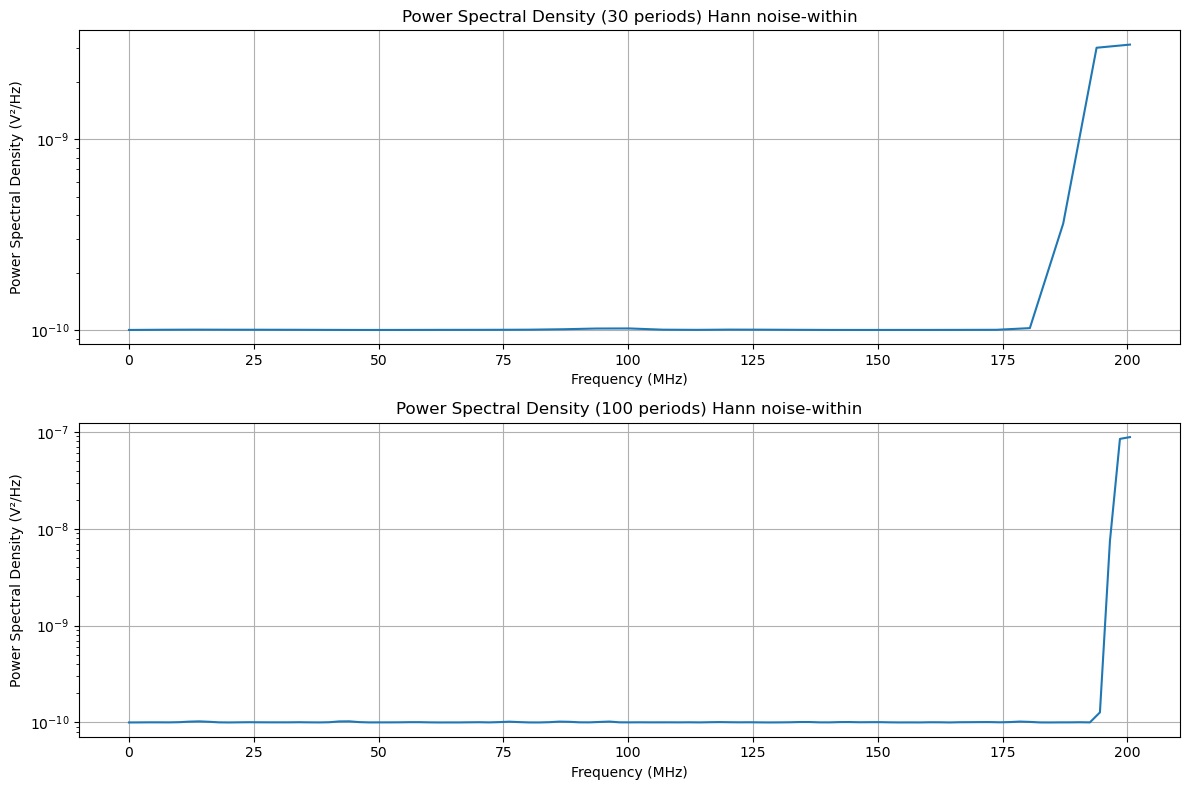

SNR for 30 periods: 28.51731613526436 dB
SNR for 100 periods: 37.738930286577734 dB


In [ ]:
def second_5_with_window():


    
    f_signal = 200e6  
    Fs = 401e6  
    T_period = 1 / f_signal  
    num_periods_30 = 30  
    num_periods_100 = 100  
    bit_resolution = 6  
    full_scale = 1.0  


    
    t_period_30 = np.arange(0, num_periods_30 * T_period, 1 / Fs)
    t_period_100 = np.arange(0, num_periods_100 * T_period, 1 / Fs)

    
    signal_30 = full_scale * np.sin(2 * np.pi * f_signal * t_period_30)
    signal_100 = full_scale * np.sin(2 * np.pi * f_signal * t_period_100)
    



    SNR_target = 38
    P_signal_30 = np.var(signal_30)
    P_signal_100 = np.var(signal_100)
    SNR_linear = 10 ** (SNR_target/10)

    P_noise_30 = P_signal_30 / SNR_linear
    P_noise_100 = P_signal_100 / SNR_linear

    
    gaussian_noise_30 = np.sqrt(P_noise_30) * np.random.randn(len(t_period_30))
    gaussian_noise_100 = np.sqrt(P_noise_100) * np.random.randn(len(t_period_100))

    signal_noise_30 = signal_30 + gaussian_noise_30
    signal_noise_100 = signal_100 + gaussian_noise_100




    # plt.figure(figsize=(10,4))
    # plt.plot(t_period * 1e6, signal)
    # plt.xlabel('Time (µs)')
    # plt.ylabel('Amplitude (V)')
    # plt.title('Noisy 2 MHz Tone Sampled at 5 MHz (SNR = 50 dB)')
    # plt.grid()
    # plt.show()

    
    quant_levels = 2 ** bit_resolution  
    quantized_signal_100 = np.round(signal_noise_100 * (quant_levels / 2)) * (2 / quant_levels)
    quantized_signal_30 = np.round(signal_noise_30 * (quant_levels / 2)) * (2 / quant_levels)
    # print(quantized_signal)



    
    window_30 = hann(len(quantized_signal_30))  # Hanning window
    window_original_30 = signal_noise_30 * hann(len(signal_noise_30))
    windowed_signal_30 = quantized_signal_30 * window_30

    
    window_100 = hann(len(quantized_signal_100))  
    window_original_100 = signal_noise_100 * hann(len(signal_noise_100))
    windowed_signal_100 = quantized_signal_100 * window_100

    
    nperseg_value_30 = min(2048, len(windowed_signal_30[:int(num_periods_30 * T_period * Fs)]))
    frequencies_30, psd_30 = welch(windowed_signal_30[:int(num_periods_30 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_30)

    
    nperseg_value_100 = min(2048, len(windowed_signal_100[:int(num_periods_100 * T_period * Fs)]))
    frequencies_100, psd_100 = welch(windowed_signal_100[:int(num_periods_100 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_100)

    
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.semilogy(frequencies_30 / 1e6, psd_30 + 1e-10)  
    plt.title("Power Spectral Density (30 periods) Hann noise-within")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(frequencies_100 / 1e6, psd_100 + 1e-10)  
    plt.title("Power Spectral Density (100 periods) Hann noise-within")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.tight_layout()
    plt.show()

    
    P_signal_30 = np.var(window_original_30)  
    # P_noise_30 = np.mean(psd_30[(frequencies_30 > 2e8) | (frequencies_30 < 2e8)])  # Noise power around signal region
    final_noise_30 = windowed_signal_30 - window_original_30
    P_noise_30 = np.var(final_noise_30)
    SNR_30_dB = 10 * np.log10(P_signal_30 / P_noise_30)


    P_signal_100 = np.var(window_original_100)
    # P_noise_100 = np.mean(psd_100[(frequencies_100 > 2e8) | (frequencies_100 < 2e8)])
    final_noise_100 = windowed_signal_100 - window_original_100
    P_noise_100 = np.var(final_noise_100)
    SNR_100_dB = 10 * np.log10(P_signal_100 / P_noise_100)

    
    print(f"SNR for 30 periods: {SNR_30_dB} dB")
    print(f"SNR for 100 periods: {SNR_100_dB} dB")


second_5_with_window()

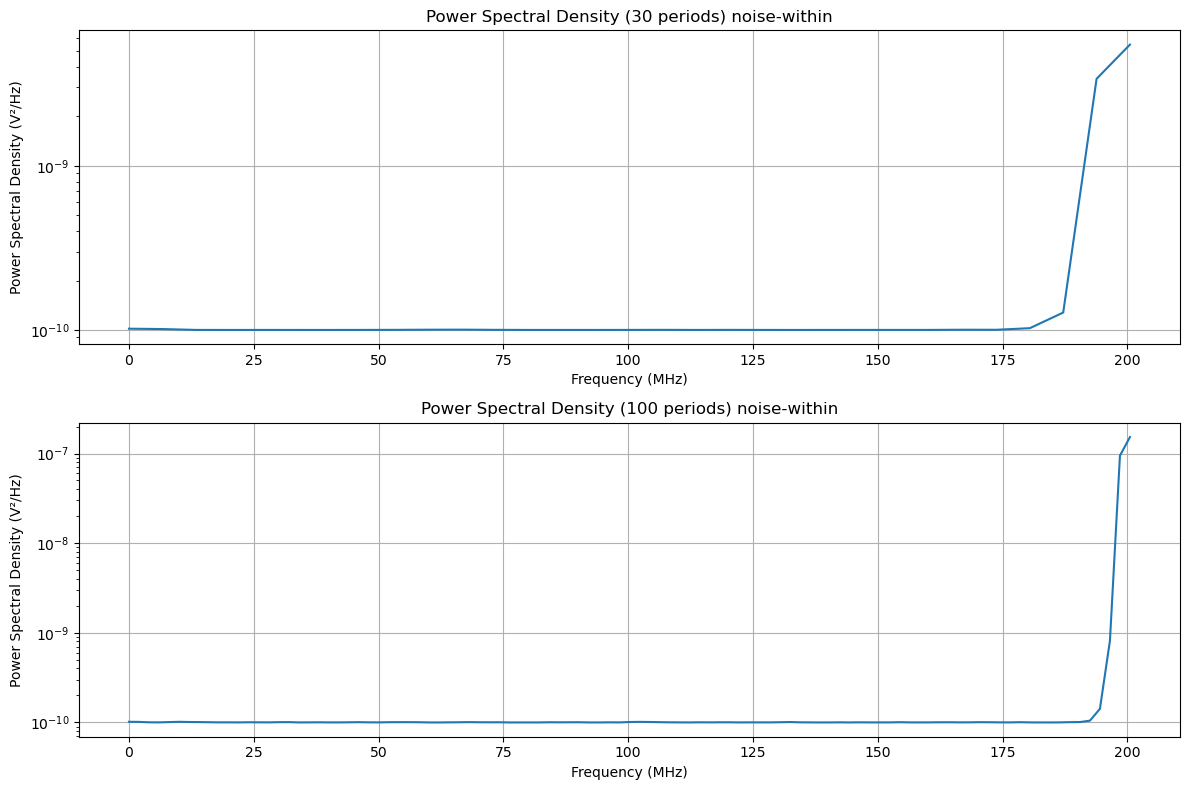

SNR for 30 periods: 36.901358085449004 dB
SNR for 100 periods: 38.151092381886784 dB


In [ ]:
def second_5_without_window():


    
    f_signal = 200e6  
    Fs = 401e6  
    T_period = 1 / f_signal  
    num_periods_30 = 30  
    num_periods_100 = 100  
    bit_resolution = 12  
    full_scale = 1.0  


    
    t_period_30 = np.arange(0, num_periods_30 * T_period, 1 / Fs)
    t_period_100 = np.arange(0, num_periods_100 * T_period, 1 / Fs)

    
    signal_30 = full_scale * np.sin(2 * np.pi * f_signal * t_period_30)
    signal_100 = full_scale * np.sin(2 * np.pi * f_signal * t_period_100)
    # print(signal)



    SNR_target = 38
    P_signal_30 = np.mean(signal_30**2)
    P_signal_100 = np.mean(signal_100**2)
    SNR_linear = 10 ** (SNR_target/10)

    P_noise_30 = P_signal_30 / SNR_linear
    P_noise_100 = P_signal_100 / SNR_linear

    
    gaussian_noise_30 = np.sqrt(P_noise_30) * np.random.randn(len(t_period_30))
    gaussian_noise_100 = np.sqrt(P_noise_100) * np.random.randn(len(t_period_100))

    signal_noise_30 = signal_30 + gaussian_noise_30
    signal_noise_100 = signal_100 + gaussian_noise_100




    # plt.figure(figsize=(10,4))
    # plt.plot(t_period * 1e6, signal)
    # plt.xlabel('Time (µs)')
    # plt.ylabel('Amplitude (V)')
    # plt.title('Noisy 2 MHz Tone Sampled at 5 MHz (SNR = 50 dB)')
    # plt.grid()
    # plt.show()

    
    quant_levels = 2 ** bit_resolution  
    quantized_signal_100 = np.round(signal_noise_100 * (quant_levels / 2)) * (2 / quant_levels)
    quantized_signal_30 = np.round(signal_noise_30 * (quant_levels / 2)) * (2 / quant_levels)
    # print(quantized_signal)



    
    # window_30 = hann(len(quantized_signal_30))  
    # windowed_signal_30 = quantized_signal_30 

    
    # window_100 = hann(len(quantized_signal_100))  
    # windowed_signal_100 = quantized_signal_100 * window_100

    
    nperseg_value_30 = min(20480, len(quantized_signal_30[:int(num_periods_30 * T_period * Fs)]))
    frequencies_30, psd_30 = welch(quantized_signal_30[:int(num_periods_30 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_30)

    
    nperseg_value_100 = min(20480, len(quantized_signal_100[:int(num_periods_100 * T_period * Fs)]))
    frequencies_100, psd_100 = welch(quantized_signal_100[:int(num_periods_100 * T_period * Fs)], fs=Fs, nperseg=nperseg_value_100)

    
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.semilogy(frequencies_30 / 1e6, psd_30 + 1e-10)  
    plt.title("Power Spectral Density (30 periods) noise-within")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogy(frequencies_100 / 1e6, psd_100 + 1e-10)  
    plt.title("Power Spectral Density (100 periods) noise-within")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.grid()

    plt.tight_layout()
    plt.show()

    
    P_signal_30 = np.var(signal_30)  
    # P_noise_30 = np.mean(psd_30[(frequencies_30 > 2e8) | (frequencies_30 < 2e8)])  # Noise power around signal region
    final_noise_30 = quantized_signal_30 - signal_30
    P_noise_30 = np.var(final_noise_30)
    SNR_30_dB = 10 * np.log10(P_signal_30 / P_noise_30)

    
    P_signal_100 = np.var(signal_100)
    # P_noise_100 = np.mean(psd_100[(frequencies_100 > 2e8) | (frequencies_100 < 2e8)])
    final_noise_100 = quantized_signal_100 - signal_100
    P_noise_100 = np.var(final_noise_100)
    SNR_100_dB = 10 * np.log10(P_signal_100 / P_noise_100)

    
    print(f"SNR for 30 periods: {SNR_30_dB} dB")
    print(f"SNR for 100 periods: {SNR_100_dB} dB")


second_5_without_window()